In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import simtk.openmm as mm
from simtk import unit
from openmmtools.testsystems import LennardJonesFluid


Torrie, G. M., & Valleau, J. P. (1977). Nonphysical sampling distributions in Monte Carlo free-energy estimation: Umbrella sampling. Journal of Computational Physics, 23(2), 187–199.
doi:10.1016/0021-9991(77)90121-8 

In [52]:
sigma = 3.4*unit.angstrom
epsilon = 0.238 * unit.kilocalories_per_mole

# number particles larger than the system in the paper
LJfluid = LennardJonesFluid(nparticles=200, sigma=sigma, epsilon=epsilon, reduced_density=0.85)

In [53]:
kBT = 2.74*epsilon
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
T = (kBT/kB).in_units_of(unit.kelvin)
print('Temperature {}'.format(T))

Temperature 328.15913329971914 K


In [54]:
collision_rate = 5/unit.picoseconds
timestep = 2.5*unit.femtoseconds

In [55]:
LJfluid.system.getDefaultPeriodicBoxVectors()

[Quantity(value=Vec3(x=2.0990169245952677, y=0.0, z=0.0), unit=nanometer),
 Quantity(value=Vec3(x=0.0, y=2.0990169245952677, z=0.0), unit=nanometer),
 Quantity(value=Vec3(x=0.0, y=0.0, z=2.0990169245952677), unit=nanometer)]

In [56]:
# Create a context
integrator = mm.LangevinIntegrator(T, collision_rate, timestep)
context = mm.Context(LJfluid.system, integrator)
context.setPositions(LJfluid.positions)

# Minimize energy
print('Minimizing energy...')
mm.LocalEnergyMinimizer.minimize(context)

Minimizing energy...


In [ ]:
## ver:
https://github.com/choderalab/openmm7tutorials/tree/master/alchemical-free-energy
http://openmm.org/tutorials/alchemical-free-energy/
https://openmmtools.readthedocs.io/en/latest/api/generated/openmmtools.testsystems.LennardJonesFluid.html
https://openmmtools.readthedocs.io/en/latest/testsystems.html

In [57]:
3*sigma

Quantity(value=10.2, unit=angstrom)

In [14]:
def LJ_potential(distance, sigma, epsilon):
    q=sigma/distance
    q6=q**6
    q12=q6**2
    return 4.0*epsilon*(q12-q6)

In [16]:
dd = np.linspace(0.001,3.0, 200, endpoint=True)*sigma

(-1.0, 4.0)

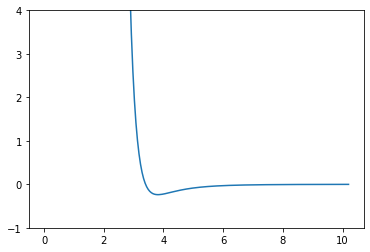

In [22]:
plt.plot(dd,LJ_potential(dd, sigma, epsilon))
plt.ylim(-1.0,4.0)

In [34]:
ff=LJfluid.system.getForces()

In [42]:
ff[0].getCutoffDistance()

Quantity(value=1.02, unit=nanometer)

[0.0, 0, 0, 0]